সারসংক্ষেপে, এই কোডটি সিগন্যাল প্রক্রিয়াকরণে অটোকরিলেশন এবং ক্রস-করিলেশন ফাংশন ব্যবহার করে, যেখানে একটি সাইনাসয়েডাল সিগন্যালের অটোকরিলেশন, শিফটেড সংস্করণের সাথে ক্রস-করিলেশন, এবং নয়েজযুক্ত সিগন্যালের সাথে ক্রস-করিলেশন গণনা করা হয়ে

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate, correlation_lags


In [3]:

# Define autocorrelation function
def compute_autocorrelation(signal):
    auto_corr = correlate(signal, signal, mode='full', method='auto')
    lags = correlation_lags(len(signal), len(signal), mode='full')
    return auto_corr, lags

In [4]:

# Define cross-correlation function
def compute_cross_correlation(signal1, signal2):
    cross_corr = correlate(signal1, signal2, mode='full', method='auto')
    lags = correlation_lags(len(signal1), len(signal2), mode='full')
    return cross_corr, lags

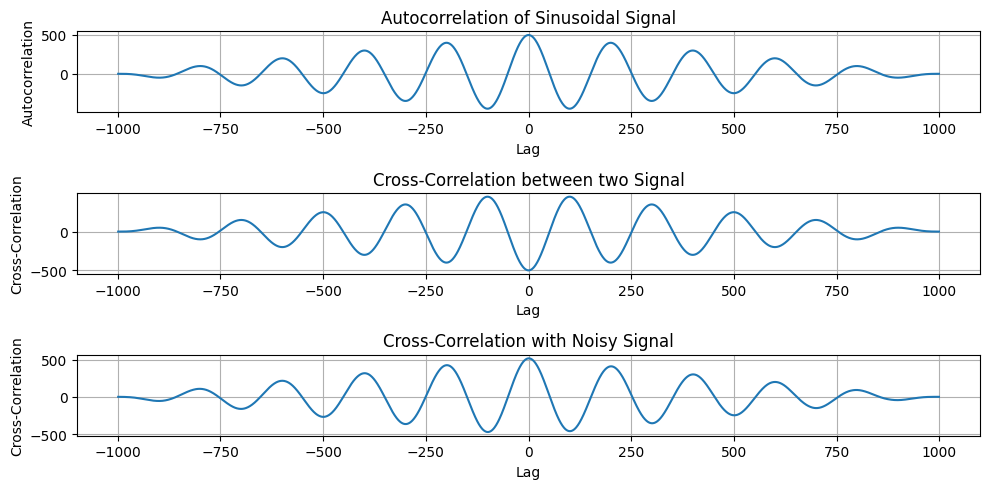

In [5]:

# Sampling frequency and time vector
fs = 1000
t = np.linspace(0, 1, fs)
freq = 5

# Sinusoidal signal
signal1 = np.sin(2 * np.pi * freq * t)

# Autocorrelation of signal1
auto_corr, lags_auto = compute_autocorrelation(signal1)

# Cross-correlation with a shifted version of the signal
signal2 = np.roll(signal1, 100)
cross_corr, lags_cross = compute_cross_correlation(signal1, signal2)

# Cross-correlation with noisy signal
noise = np.random.normal(0, 0.5, fs)
noisy_signal = signal1 + noise
cross_corr_noise, lags_noise = compute_cross_correlation(signal1, noisy_signal)

# Plot all results in one figure
plt.figure(figsize=(10, 5))

# Autocorrelation plot
plt.subplot(3, 1, 1)
plt.plot(lags_auto, auto_corr)
plt.title("Autocorrelation of Sinusoidal Signal")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.grid(True)

# Cross-correlation plot (shifted signal)
plt.subplot(3, 1, 2)
plt.plot(lags_cross, cross_corr)
plt.title("Cross-Correlation between two Signal")
plt.xlabel("Lag")
plt.ylabel("Cross-Correlation")
plt.grid(True)

# Cross-correlation with noisy signal
plt.subplot(3, 1, 3)
plt.plot(lags_noise, cross_corr_noise)
plt.title("Cross-Correlation with Noisy Signal")
plt.xlabel("Lag")
plt.ylabel("Cross-Correlation")
plt.grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


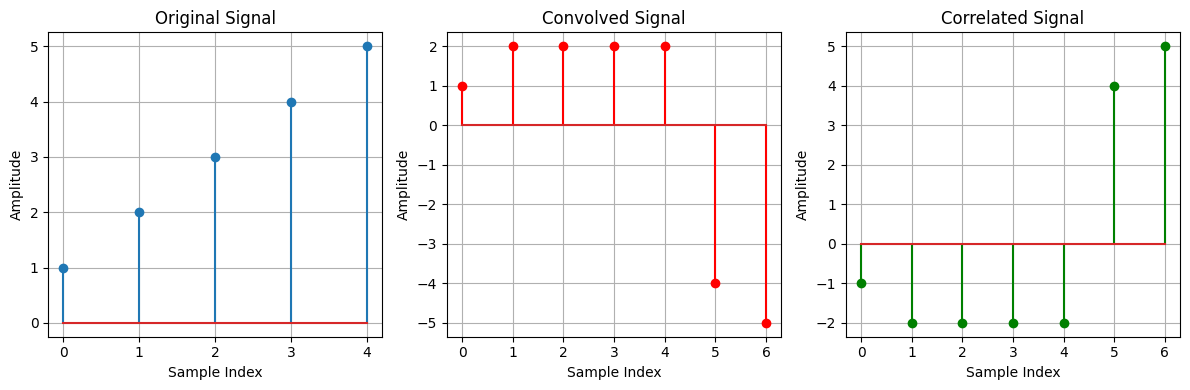

In [6]:

# Define signal and kernel
signal = np.array([1, 2, 3, 4, 5])
kernel = np.array([1, 0, -1])

# Perform convolution (same as cross-correlation with flipped kernel)
convolved_signal = np.convolve(signal, kernel, mode='full')

# Perform cross-correlation by flipping the kernel
correlated_signal = np.correlate(signal, kernel, mode='full')

# Plot signals
plt.figure(figsize=(12, 4))

# Plot the original signal
plt.subplot(1, 3, 1)
plt.stem(signal)
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('Original Signal')
plt.grid(True)

# Plot the convolved signal
plt.subplot(1, 3, 2)
plt.stem(convolved_signal, linefmt='r', markerfmt='ro')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('Convolved Signal')
plt.grid(True)

# Plot the correlated signal
plt.subplot(1, 3, 3)
plt.stem(correlated_signal, linefmt='g', markerfmt='go')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('Correlated Signal')
plt.grid(True)

plt.tight_layout()
plt.show()
